In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [57]:
df = pd.read_excel("Reporte_Fred.xls",parse_dates=["Fecha"]) #importar excel con datos diarios
df = df.set_index('Fecha') #formato fecha columna "Fecha"
df.head() 
#df.describe()


,Puno,Granja Salcedo,Los Uros,Rincon de la Cruz,Mañazo,Umayo,Illpa,Capachica,Cabanillas,Lagunillas,Santa Lucia,Juliaca,Isla Taquile,Los Rosales
Fecha,,,,,,,,,,,,,,
1981-01-01,1.055381,1.055381,1.768833,1.124486,6.527376,2.506848,1.450641,1.512668,2.568420,3.879782,4.187809,9.964472,0.314903,4.040690
1981-01-02,0.358416,0.358416,1.375031,0.419796,0.830474,0.905006,0.421534,0.485755,2.131290,0.135782,0.359897,8.571392,11.789124,0.470622
1981-01-03,4.430766,4.430766,3.790666,5.111813,3.610356,3.401787,5.300224,7.247430,0.006095,8.611485,0.897279,4.992538,25.293331,2.415986
1981-01-04,4.333294,4.333294,7.564921,4.485079,5.191894,4.514864,5.117934,6.891667,10.505732,2.429222,0.464330,8.370489,2.900946,4.008249
1981-01-05,2.449920,2.449920,3.144224,2.064915,7.209180,2.834304,1.922991,3.803028,4.182236,3.377323,5.344374,8.918043,3.003328,3.767361


In [58]:
df.index

DatetimeIndex(['1981-01-01', '1981-01-02', '1981-01-03', '1981-01-04',
               '1981-01-05', '1981-01-06', '1981-01-07', '1981-01-08',
               '1981-01-09', '1981-01-10',
               ...
               '2021-05-22', '2021-05-23', '2021-05-24', '2021-05-25',
               '2021-05-26', '2021-05-27', '2021-05-28', '2021-05-29',
               '2021-05-30', '2021-05-31'],
              dtype='datetime64[ns]', name='Fecha', length=14744, freq=None)

In [74]:
#Definir rangos de fechas a filtrar
anos_lluviosos = [1984, 1986, 2001, 2012] #anos mas lluviosos
#definir comienzo y fin 1984
comienzo_1984 = '1984-02-01' 
fin_1984 = '1984-02-29'
#definir comienzo y fin 1986
comienzo_1986 = '1986-02-01'
fin_1986 = '1986-02-28'
#definir comienzo y fin 2001
comienzo_2001 = '2001-01-01'
fin_2001 = '2001-01-31'
#definir comienzo y fin 2012
comienzo_2012 = '2012-02-01'
fin_2012 = '2012-02-29'
#definir mascaras
mask1984 = (df.index >= comienzo_1984) & (df.index <= fin_1984)
mask1986 = (df.index >= comienzo_1986) & (df.index <= fin_1986)
mask2001 = (df.index >= comienzo_2001) & (df.index <= fin_2001)
mask2012 = (df.index >= comienzo_2012) & (df.index <= fin_2012)
#guardar cada ano en df separado
pp_diaria_1984 = df.loc[mask1984]
pp_diaria_1984.index = pd.date_range('1984-02-01', '1984-02-29', freq='D').strftime('%d')
pp_diaria_1986 = df.loc[mask1986]
pp_diaria_1986.index = pd.date_range('1986-02-01', '1986-02-28', freq='D').strftime('%d')
pp_diaria_2001 = df.loc[mask2001]
pp_diaria_2001.index = pd.date_range('2001-01-01', '2001-01-31', freq='D').strftime('%d')
pp_diaria_2012 = df.loc[mask2012]
pp_diaria_2012.index = pd.date_range('2012-02-01', '2012-02-29', freq='D').strftime('%d')

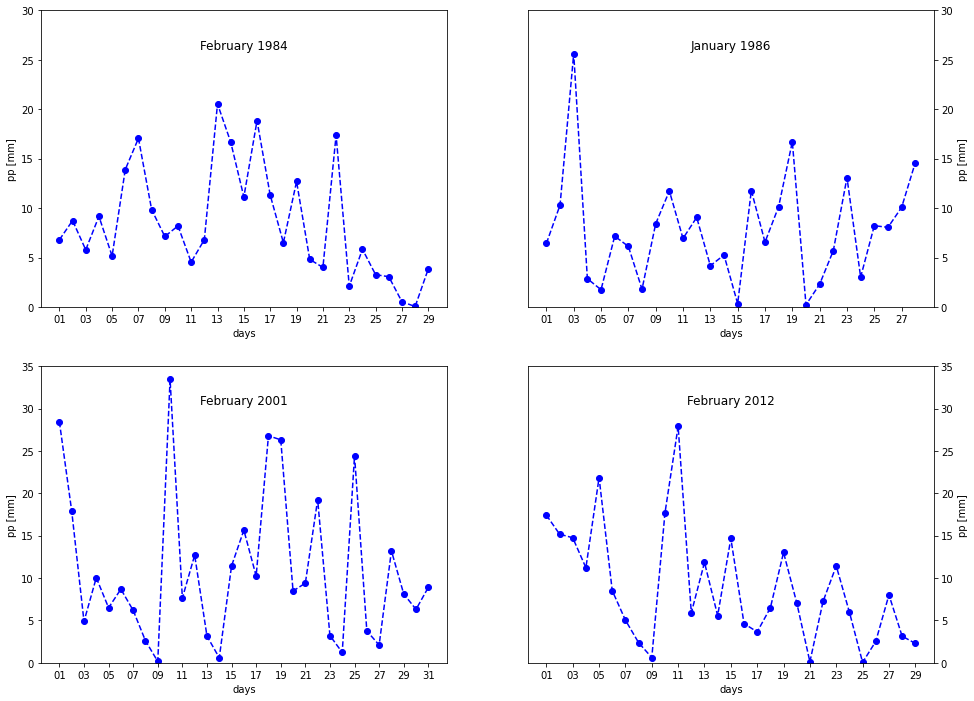

In [111]:
#plotear
eje_dias = list(range(1,32))
fig, axs = plt.subplots(2,2, figsize=(16,12))
axs[0,0].plot(pp_diaria_1984.index,
        pp_diaria_1984['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[0,0].set_ylim(0, 30)
axs[0,0].set_xlabel("days")
axs[0,0].set_ylabel("pp [mm]")
axs[0,0].set_title("February 1984", x=0.5, y=0.85)
axs[0,0].set_xticks(range(0, len(pp_diaria_1984.index), 2))
#axs[0,0].set_xticklabels(labels=eje_dias, rotation=60)
axs[0,1].plot(pp_diaria_1986.index,
        pp_diaria_1986['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[0,1].set_ylim(0,30)
axs[0,1].set_xlabel("days")
axs[0,1].set_ylabel("pp [mm]")
axs[0,1].set_xticks(range(0, len(pp_diaria_1986.index), 2))
#axs[0,1].set_xticklabels(labels=eje_dias, rotation=60)
axs[0,1].set_title("January 1986", x=0.5, y=0.85)
axs[0,1].yaxis.set_label_position("right")
axs[0,1].yaxis.tick_right()
axs[1,0].plot(pp_diaria_2001.index,
        pp_diaria_2001['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[1,0].set_ylim(0, 35)
axs[1,0].set_xlabel("days")
axs[1,0].set_ylabel("pp [mm]")
axs[1,0].set_title("February 2001", x=0.5, y=0.85)
axs[1,0].set_xticks(range(0, len(pp_diaria_2001.index), 2))
#axs[1,0].set_xticklabels(labels=eje_dias, rotation=60)
axs[1,1].plot(pp_diaria_2012.index,
        pp_diaria_2012['Mañazo'],
        color="blue",
        linestyle='dashed', marker="o")
axs[1,1].set_ylim(0, 35)
axs[1,1].set_xlabel("days")
axs[1,1].set_ylabel("pp [mm]")
axs[1,1].set_title("February 2012", x=0.5, y=0.85)
axs[1,1].set_xticks(range(0, len(pp_diaria_2012.index), 2))
#axs[1,1].set_xticklabels(labels=eje_dias, rotation=60)
axs[1,1].yaxis.set_label_position("right")
axs[1,1].yaxis.tick_right()


plt.savefig("diaria_anos_lluviosos.png")

plt.show()